In [60]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#data preparation
data=pd.read_csv("dataset/cancer patient data sets.csv")
data= data.drop("Patient Id", axis=1)
data= data.drop("index", axis=1)

target= data.pop("Level")
x_train, x_test, y_train, y_test = train_test_split(data,target, test_size=0.25, random_state=1)

<AxesSubplot: >

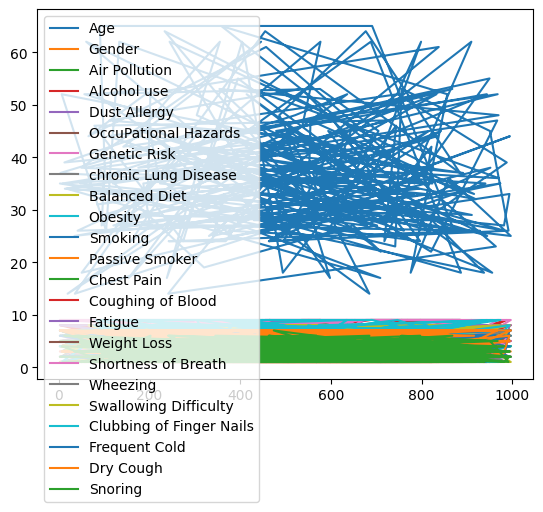

In [57]:

x_test.plot()

In [45]:
model= LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Samo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
predictions= model.predict(x_test)
score = model.score(x_test, y_test)
print(score)

0.984


In [58]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[94  0  0]
 [ 0 78  0]
 [ 0  4 74]]


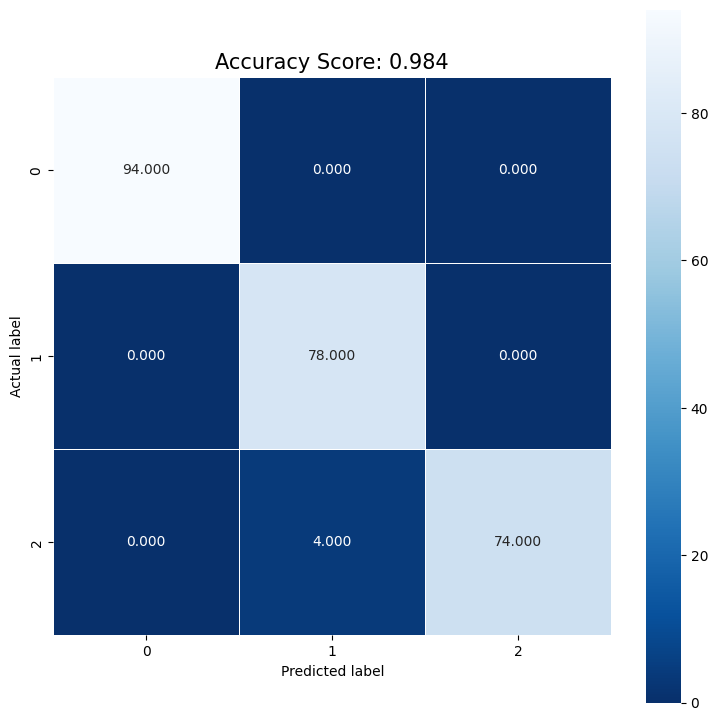

In [59]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [67]:
#save model to file
with open("predict_lung_cancer.txt", "wb") as f:
    pickle.dump(model, f)
